<a href="https://colab.research.google.com/github/hozhao87/Data_Visualization_Project/blob/main/scRNA_seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A single-cell analysis of breast cancer cell lines to study tumour heterogeneity
# Data Source: https://www.nature.com/articles/s41467-022-29358-6
# MTX data files taken from https://figshare.com/articles/dataset/Single_Cell_Breast_Cancer_cell-line_Atlas/15022698

# 1. Install/import modules

In [ ]:
! pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.6 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=5dd80d7087bf8ceb39d8b301d45183cd206078aae2c7e2ef9ff05ddcdf85c1f4
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [ ]:
import scanpy as sc
import anndata
import scipy.io
import time
import os
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
import seaborn as sns

from google.colab import drive

# 2. Read the data file

In [1]:
drive.mount('/content/drive')

NameError: name 'drive' is not defined

In [ ]:
os.getcwd()
os.listdir('/content/drive/MyDrive/Colab Notebooks')

['GSE173634_Human_BreastCancer_32CellLines_Y2021_35276Cells_Figshare_Counts_Gambardella_diBernardo.h5ad',
 'features.tsv',
 'barcodes.tsv',
 'matrix.mtx',
 'Untitled0.ipynb',
 'Gene_Expression_Distribution_by_Cancer_Subtype.png',
 'Gene_Expression_Distribution_by_Cancer_Subtype_2.png',
 'Gene_Expression_Distribution_by_Cancer_Subtype_violin.png',
 'Gene_Expression_Distribution_in_Single_Cell.png',
 'UMAP_of_Cancer_Subtype.png',
 'UMAP_of_Gene_Expression.png',
 'Enrichment_in_Pathways.png',
 'Heatmap_of_Cell_Type_Counts.png',
 'Pathways_Percentage_by_Gene_Type.xlsx',
 'scRNA_seq.ipynb']

In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/'
adata = sc.read_h5ad(data_path+"GSE173634_Human_BreastCancer_32CellLines_Y2021_35276Cells_Figshare_Counts_Gambardella_diBernardo.h5ad")

/usr/local/lib/python3.10/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
adata.obs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35276 entries, 0 to 35275
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   FullCode   35276 non-null  object  
 1   Cell Type  35276 non-null  category
dtypes: category(1), object(1)
memory usage: 1.6+ MB


In [ ]:
adata.var.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47096 entries, TSPAN6 to ENSG00000284685
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Ensembl         47096 non-null  object  
 1   Entrezgene      20483 non-null  category
 2   Type of gene    20483 non-null  category
 3   Map location    20472 non-null  category
 4   chr             45772 non-null  category
 5   start           45772 non-null  float64 
 6   end             45772 non-null  float64 
 7   strand          45772 non-null  float64 
 8   Count Pubmed    15924 non-null  float64 
 9   Count Pathways  46982 non-null  float64 
 10  Name            34532 non-null  category
 11  Other names     18707 non-null  category
dtypes: category(6), float64(5), object(1)
memory usage: 6.7+ MB


In [ ]:
display(adata.var.info(), adata.var.head(), adata.var.describe(), adata.var.describe(include="O"))

<class 'pandas.core.frame.DataFrame'>
Index: 47096 entries, TSPAN6 to ENSG00000284685
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Ensembl         47096 non-null  object  
 1   Entrezgene      20483 non-null  category
 2   Type of gene    20483 non-null  category
 3   Map location    20472 non-null  category
 4   chr             45772 non-null  category
 5   start           45772 non-null  float64 
 6   end             45772 non-null  float64 
 7   strand          45772 non-null  float64 
 8   Count Pubmed    15924 non-null  float64 
 9   Count Pathways  46982 non-null  float64 
 10  Name            34532 non-null  category
 11  Other names     18707 non-null  category
dtypes: category(6), float64(5), object(1)
memory usage: 6.7+ MB


None

,Ensembl,Entrezgene,Type of gene,Map location,chr,start,end,strand,Count Pubmed,Count Pathways,Name,Other names
Symbol,,,,,,,,,,,,
TSPAN6,ENSG00000000003,7105,protein-coding,Xq22.1,X,100627108.0,100639991.0,-1.0,5.0,0.0,tetraspanin 6,"['A15 homolog', 'putative NF-kappa-B-activatin..."
DPM1,ENSG00000000419,8813,protein-coding,20q13.13,20,50934867.0,50959140.0,-1.0,NaN,18.0,dolichyl-phosphate mannosyltransferase subunit...,"['DPM synthase complex, catalytic subunit', 'D..."
SCYL3,ENSG00000000457,57147,protein-coding,1q24.2,1,169849631.0,169894267.0,-1.0,2.0,0.0,SCY1 like pseudokinase 3,"['SCY1-like 3', 'SCY1-like protein 3', 'SCY1-l..."
C1orf112,ENSG00000000460,55732,protein-coding,1q24.2,1,169662007.0,169854080.0,1.0,4.0,0.0,chromosome 1 open reading frame 112,uncharacterized protein C1orf112
FUCA2,ENSG00000001036,2519,protein-coding,6q24.2,6,143494812.0,143511720.0,-1.0,6.0,9.0,alpha-L-fucosidase 2,"['I+/--L-fucosidase 2', 'a-L-fucosidase 2', 'a..."


,start,end,strand,Count Pubmed,Count Pathways
count,4.577200e+04,4.577200e+04,45772.000000,15924.000000,46982.000000
mean,7.550634e+07,7.554495e+07,0.008346,57.345516,3.921034
std,5.531172e+07,5.531495e+07,0.999976,223.767758,14.834585
min,1.155500e+04,1.350100e+04,-1.000000,1.000000,0.000000
25%,3.215008e+07,3.217646e+07,-1.000000,3.000000,0.000000
50%,6.311870e+07,6.314007e+07,1.000000,11.000000,0.000000
75%,1.107287e+08,1.107768e+08,1.000000,36.000000,0.000000
max,2.489366e+08,2.489370e+08,1.000000,9888.000000,462.000000


,Ensembl
count,47096
unique,47096
top,ENSG00000284685
freq,1


In [ ]:
adata.var.columns

Index(['Ensembl', 'Entrezgene', 'Type of gene', 'Map location', 'chr', 'start',
       'end', 'strand', 'Count Pubmed', 'Count Pathways', 'Name',
       'Other names'],
      dtype='object')

## Check Missing values

<Axes: ylabel='Symbol'>

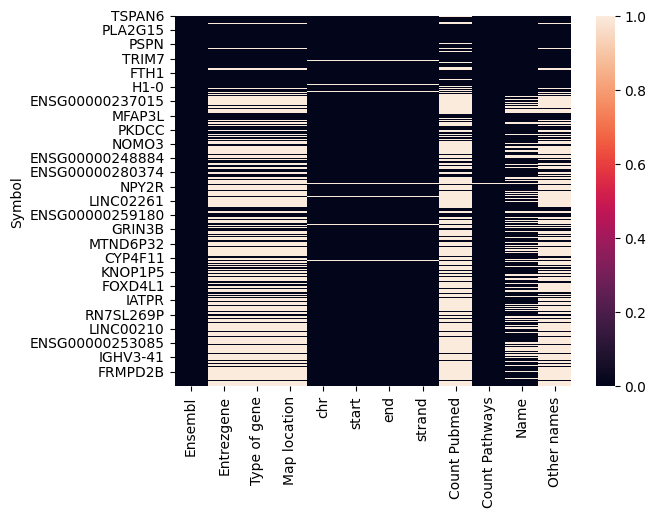

In [ ]:
sns.heatmap(adata.var.isna())

In [ ]:
adata.var["Type of gene"].unique()

['protein-coding', NaN, 'pseudo', 'ncRNA', 'snoRNA', 'snRNA', 'scRNA', 'rRNA']
Categories (7, object): ['ncRNA', 'protein-coding', 'pseudo', 'rRNA', 'scRNA', 'snRNA', 'snoRNA']

In [ ]:
adata.var["chr"].unique()
adata.var.loc[adata.var.chr.isna()]

,Ensembl,Entrezgene,Type of gene,Map location,chr,start,end,strand,Count Pubmed,Count Pathways,Name,Other names
Symbol,,,,,,,,,,,,
IBTK,ENSG00000005700,25998,protein-coding,6q14.1,NaN,NaN,NaN,NaN,10.0,0.0,inhibitor of Bruton tyrosine kinase,"['BTK-binding protein', 'Bruton agammaglobulin..."
MAP3K14,ENSG00000006062,9020,protein-coding,17q21.31,NaN,NaN,NaN,NaN,73.0,41.0,mitogen-activated protein kinase kinase kinase 14,"['NF-kappa-beta-inducing kinase', 'mitogen-act..."
AGK,ENSG00000006530,55750,protein-coding,7q34,NaN,NaN,NaN,NaN,29.0,10.0,acylglycerol kinase,"['acylglycerol kinase, mitochondrial', 'hAGK',..."
ADIPOR2,ENSG00000006831,79602,protein-coding,12p13.33,NaN,NaN,NaN,NaN,152.0,13.0,adiponectin receptor 2,"['adiponectin receptor protein 2', 'progestin ..."
E2F2,ENSG00000007968,1870,protein-coding,1p36.12,NaN,NaN,NaN,NaN,65.0,46.0,E2F transcription factor 2,transcription factor E2F2
...,...,...,...,...,...,...,...,...,...,...,...,...
DEFA8P,ENSG00000223629,449491,pseudo,8p23.1,NaN,NaN,NaN,NaN,NaN,0.0,"defensin alpha 8, pseudogene",NaN
USP17L7,ENSG00000226430,392197,protein-coding,8p23.1,NaN,NaN,NaN,NaN,NaN,0.0,ubiquitin specific peptidase 17 like family me...,['inactive ubiquitin carboxyl-terminal hydrola...
GOLGA8Q,ENSG00000178115,727909,protein-coding,15q13.2,NaN,NaN,NaN,NaN,NaN,2.0,golgin A8 family member Q,golgin subfamily A member 8Q


In [ ]:
chr_na = adata.var.loc[adata.var.chr.isna()]['Map location'].str.extract(r"(\d{1,24}|X|Y)")[0]#.unique()#.notna()#.value_counts()

In [ ]:
chr_na.values

array(['6', '17', '7', ..., '15', nan, '17'], dtype=object)

In [ ]:
chr_na

,0
Symbol,
IBTK,6
MAP3K14,17
AGK,7
ADIPOR2,12
E2F2,1
...,...
DEFA8P,8
USP17L7,8
GOLGA8Q,15


In [ ]:
adata.var.chr.isna().sum()

1324

In [ ]:
# str.extract() # ask gpt to extract what you want using regex

In [ ]:
adata.var.loc[adata.var.chr.isna(), 'chr'] = chr_na.values

In [ ]:
adata.var.chr.isna().sum()

116

In [ ]:
adata.var

,Ensembl,Entrezgene,Type of gene,Map location,chr,start,end,strand,Count Pubmed,Count Pathways,Name,Other names
Symbol,,,,,,,,,,,,
TSPAN6,ENSG00000000003,7105,protein-coding,Xq22.1,X,100627108.0,100639991.0,-1.0,5.0,0.0,tetraspanin 6,"['A15 homolog', 'putative NF-kappa-B-activatin..."
DPM1,ENSG00000000419,8813,protein-coding,20q13.13,20,50934867.0,50959140.0,-1.0,NaN,18.0,dolichyl-phosphate mannosyltransferase subunit...,"['DPM synthase complex, catalytic subunit', 'D..."
SCYL3,ENSG00000000457,57147,protein-coding,1q24.2,1,169849631.0,169894267.0,-1.0,2.0,0.0,SCY1 like pseudokinase 3,"['SCY1-like 3', 'SCY1-like protein 3', 'SCY1-l..."
C1orf112,ENSG00000000460,55732,protein-coding,1q24.2,1,169662007.0,169854080.0,1.0,4.0,0.0,chromosome 1 open reading frame 112,uncharacterized protein C1orf112
FUCA2,ENSG00000001036,2519,protein-coding,6q24.2,6,143494812.0,143511720.0,-1.0,6.0,9.0,alpha-L-fucosidase 2,"['I+/--L-fucosidase 2', 'a-L-fucosidase 2', 'a..."
...,...,...,...,...,...,...,...,...,...,...,...,...
OR52R1,ENSG00000279270,119695,protein-coding,11p15.4,11,4803433.0,4804380.0,-1.0,NaN,5.0,olfactory receptor family 52 subfamily R member 1,"['olfactory receptor 52R1', 'olfactory recepto..."
ENSG00000280920,ENSG00000280920,NaN,NaN,NaN,7,54201224.0,54202421.0,1.0,NaN,0.0,NaN,NaN
MIR4278,ENSG00000283420,100422999,ncRNA,5p15.31,5,6827853.0,6827921.0,-1.0,NaN,0.0,microRNA 4278,hsa-mir-4278


<Axes: ylabel='Symbol'>

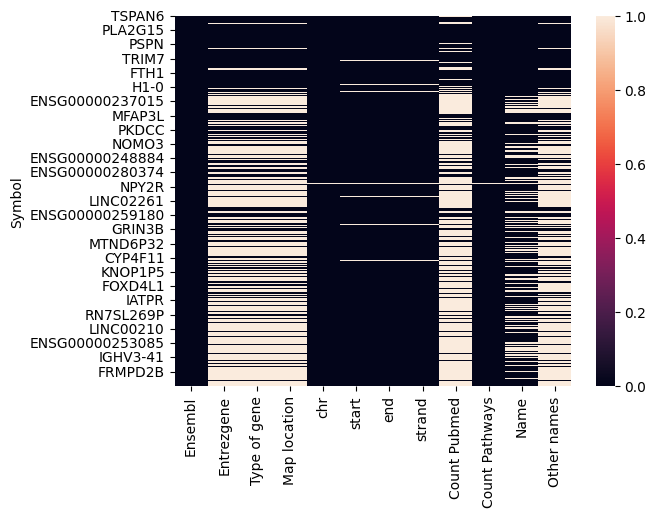

In [ ]:
sns.heatmap(adata.var.isna())

In [ ]:
# Create a new DataFrame by dropping rows where 'chr' is NaN
adata.var_clean = adata.var.dropna(subset=['chr'])

In [ ]:
adata.var_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46980 entries, TSPAN6 to ENSG00000284685
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Ensembl         46980 non-null  object  
 1   Entrezgene      20481 non-null  category
 2   Type of gene    20481 non-null  category
 3   Map location    20472 non-null  category
 4   chr             46980 non-null  category
 5   start           45772 non-null  float64 
 6   end             45772 non-null  float64 
 7   strand          45772 non-null  float64 
 8   Count Pubmed    15924 non-null  float64 
 9   Count Pathways  46980 non-null  float64 
 10  Name            34530 non-null  category
 11  Other names     18707 non-null  category
dtypes: category(6), float64(5), object(1)
memory usage: 5.7+ MB


# 3. Data Visualization

#Creat a new column to cluster the cell type to cancer subtype

In [ ]:
adata.var.columns

Index(['Ensembl', 'Entrezgene', 'Type of gene', 'Map location', 'chr', 'start',
       'end', 'strand', 'Count Pubmed', 'Count Pathways', 'Name',
       'Other names'],
      dtype='object')

In [ ]:
adata.obs['Cancer_subtype'].unique()

array(['H', 'TNA', 'TNB', 'LB', 'LA', 'Basal-like'], dtype=object)

In [ ]:
# Create a mapping of cell lines to their subtypes
cell_line_to_subtype = {
    'AU565': 'H', 'HCC1937': 'TNA', 'HCC38': 'TNB', 'MDAMB468': 'TNB', 'EFM19': 'LB',
    'HCC1187': 'TNB', 'JIMT1': 'H', 'MDAMB361': 'H', 'HCC1500': 'LB', 'HCC70': 'TNA',
    'CAL51': 'TNB', 'MDAMB415': 'TNB', 'BT549': 'TNB', 'BT483': 'LA', 'MDAMB436': 'TNB',
    'DU4475': 'TNB', 'HS578T': 'TNA', 'MCF7': 'LA', 'CAMA1': 'LA', 'BT20': 'TNA',
    'T47D': 'LA', 'EVSAT': 'LB', 'HDQP1': 'LB', 'BT474': 'LB', 'CAL851': 'LB',
    'HCC1143': 'TNA', 'MCF12A': 'Basal-like', 'HCC1954': 'H', 'KPL1': 'LB',
    'ZR751': 'LA', 'MX1': 'TNA', 'MDAMB453': 'H'
}

# Map the subtypes to the 'cancer_subtype' column
adata.obs['Cancer_subtype'] = adata.obs['Cell Type'].map(cell_line_to_subtype)

# Verify the mapping
print(adata.obs['Cell Type','Cancer_Subtype'].drop_duplicates())

KeyError: ('Cell Type', 'Cancer_Subtype')

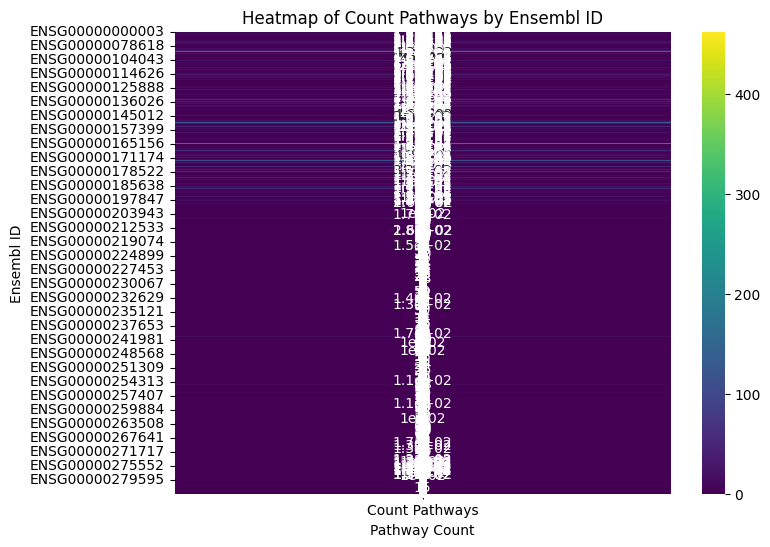

In [ ]:
heatmap_data = adata.var_clean.pivot_table(values='Count Pathways',index='Ensembl')  #, aggfunc='sum'
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="viridis")
plt.title('Heatmap of Count Pathways by Ensembl ID')
plt.xlabel('Pathway Count')
plt.ylabel('Ensembl ID')
plt.show()

## 3.2 Cell amont in different cancer subtype

<ipython-input-99-ab2306a66c20>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby(['Cancer_subtype', 'Cell Type']).size().unstack(fill_value=0)
<ipython-input-99-ab2306a66c20>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=adata.obs, x='Cancer_subtype', y='Cell Type', estimator=lambda x: len(x), ci=None)


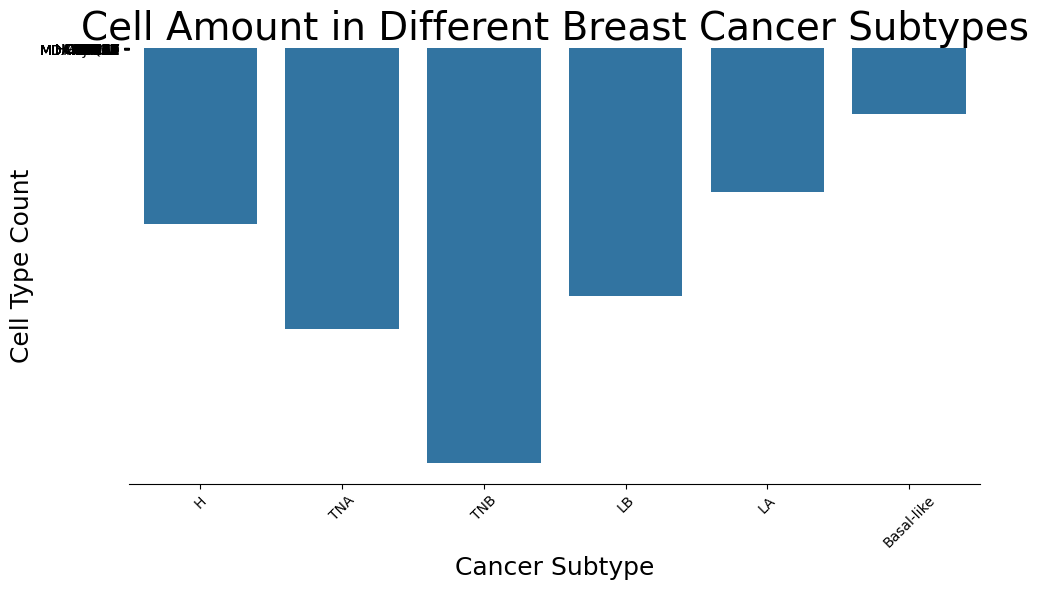

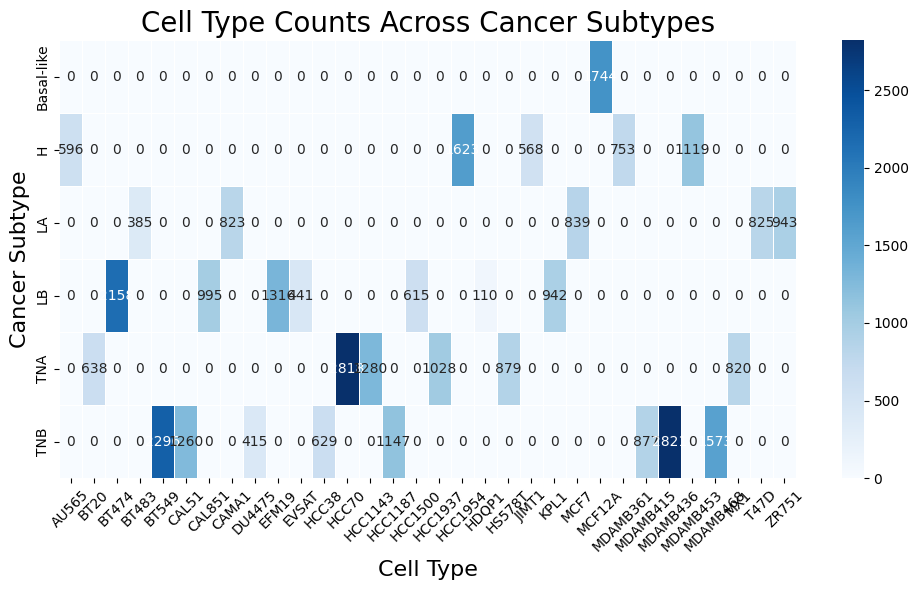

In [ ]:
# Step 1: Count the number of cells per Cancer Subtype and Cell Type
cell_type_counts = adata.obs.groupby(['Cancer_subtype', 'Cell Type']).size().unstack(fill_value=0)

# Step 2: Create a bar plot of cell counts for each cancer subtype
plt.figure(figsize=(10, 6))
sns.barplot(data=adata.obs, x='Cancer_subtype', y='Cell Type', estimator=lambda x: len(x), ci=None)
ax = plt.gca()

# Customize the plot
ax.set_title("Cell Amount in Different Breast Cancer Subtypes", fontsize=28)
ax.set_xlabel("Cancer Subtype", fontsize=18)
ax.set_ylabel("Cell Type Count", fontsize=18)
sns.despine(top=True, left=True)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
# Save the plot
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Enrichment_in_Pathways.png", transparent=True, bbox_inches="tight")

# Step 3: Plot heatmap of the cell type counts across cancer subtypes
plt.figure(figsize=(10, 6))
sns.heatmap(cell_type_counts, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title("Cell Type Counts Across Cancer Subtypes", fontsize=20)
plt.xlabel("Cell Type", fontsize=16)
plt.ylabel("Cancer Subtype", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
# Save the heatmap
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Heatmap_of_Cell_Type_Counts.png", transparent=True, bbox_inches="tight")



## 3.3 Gene Enrichment

<ipython-input-54-1377c545dbdb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = adata.var_clean.groupby("Type of gene")["Count Pathways"].mean().reset_index()


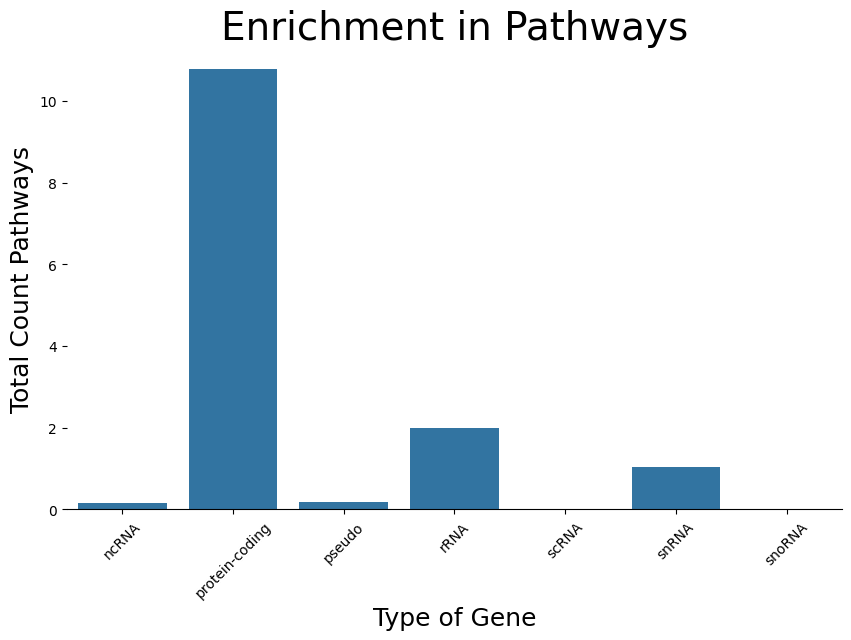

In [ ]:
# Step 1: Aggregate data (sum Count Pathways for each Type of gene)
df_agg = adata.var_clean.groupby("Type of gene")["Count Pathways"].mean().reset_index()

# Step 2: Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_agg, x="Type of gene", y="Count Pathways")

# Step 3: Customize plot
ax.set_title("Enrichment in Pathways", fontsize=28)
ax.set_xlabel("Type of Gene", fontsize=18)
ax.set_ylabel("Total Count Pathways", fontsize=18)
sns.despine(top=True, left=True)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
#plt.show()
plt.tight_layout
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Enrichment_in_Pathways.png", transparent = True, bbox_inches="tight")


In [ ]:
df_agg = adata.var_clean.groupby("Type of gene")["Count Pathways"].sum().reset_index()

# Step 2: Calculate the total sum of all Count Pathways
total_pathways = df_agg["Count Pathways"].sum()

# Step 3: Calculate the percentage of each pathway
df_agg["Percentage"] = (df_agg["Count Pathways"] / total_pathways) * 100

# Save the aggregated data with percentages to an Excel file
df_agg.to_excel("/content/drive/MyDrive/Colab Notebooks/Pathways_Percentage_by_Gene_Type.xlsx", index=False)

<ipython-input-102-413a66ba69c3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = adata.var_clean.groupby("Type of gene")["Count Pathways"].sum().reset_index()


In [ ]:
df_agg

,Type of gene,Count Pathways,Percentage
0,ncRNA,423.0,0.229619
1,protein-coding,183698.0,99.717726
2,pseudo,69.0,0.037456
3,rRNA,2.0,0.001086
4,scRNA,0.0,0.000000
5,snRNA,24.0,0.013028
6,snoRNA,2.0,0.001086


<ipython-input-29-ca162fa56949>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = adata.var_clean.groupby("Type of gene")["Count Pubmed"].mean().reset_index()


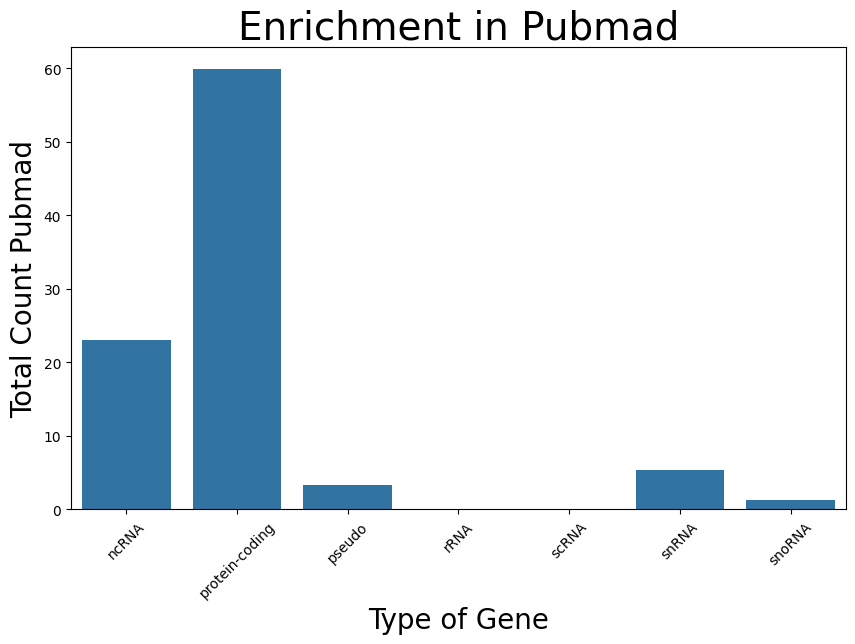

In [ ]:
# Step 1: Aggregate data (sum Count Pathways for each Type of gene)
df_agg = adata.var_clean.groupby("Type of gene")["Count Pubmed"].mean().reset_index()

# Step 2: Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_agg, x="Type of gene", y="Count Pubmed")

# Step 3: Customize plot
ax.set_title("Enrichment in Pubmad", fontsize=28)
ax.set_xlabel("Type of Gene", fontsize=20)
ax.set_ylabel("Total Count Pubmad", fontsize=20)

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

# 3.4 Data analysis in cell type specific manner**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

In [ ]:
sc.pp.neighbors(adata, use_rep='X_pca', n_neighbors=15)

In [ ]:
# Compute the neighbors graph (this step is required for UMAP and t-SNE)
# sc.pp.neighbors(adata, n_neighbors=10, use_rep='adata')  # You can change n_neighbors if needed

# Now, compute UMAP embeddings
sc.tl.umap(adata)

In [ ]:
adata.var_names_make_unique()

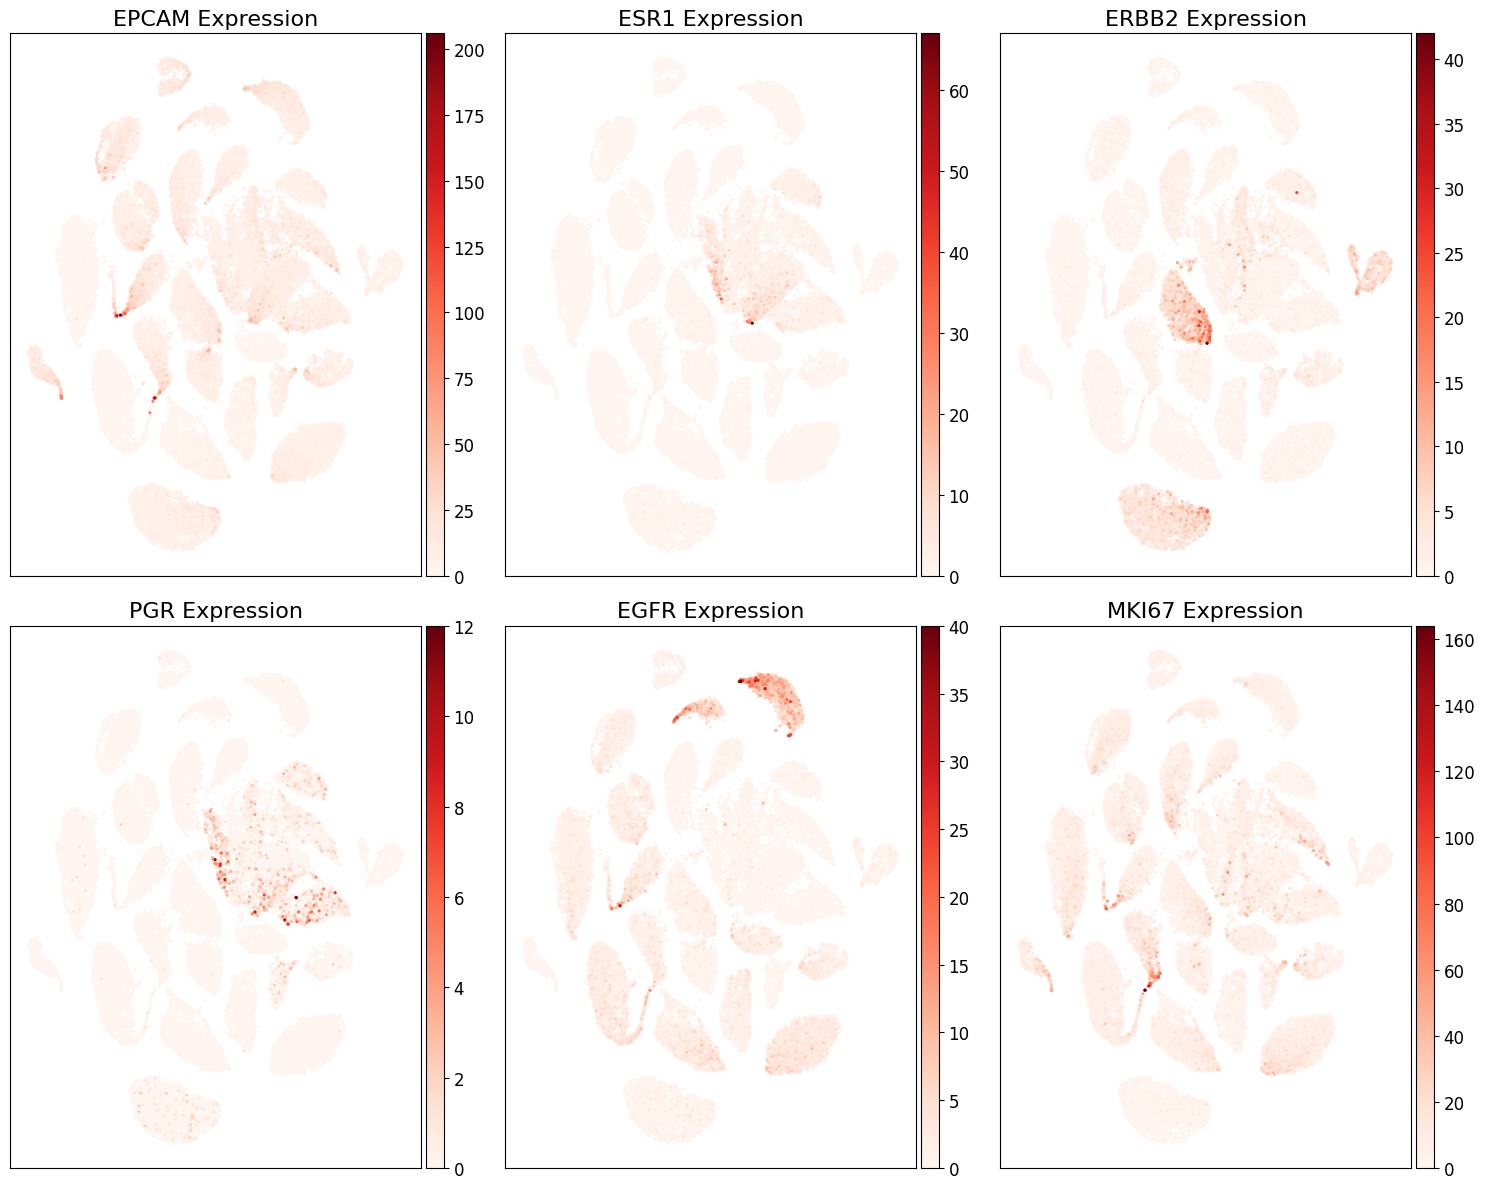

In [ ]:
# Define your genes of interest
genes_of_interest = ["EPCAM", "ESR1", "ERBB2", "PGR", "EGFR", "MKI67"]
# Filter genes to include only those that exist in the dataset
genes_to_plot = [gene for gene in genes_of_interest if gene in adata.var_names]

# Determine number of rows and columns for subplots
n_genes = len(genes_to_plot)
n_cols = 3  # Fixed number of columns
n_rows = (n_genes + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 6 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot UMAP for each gene with font size adjustments
if genes_to_plot:
    for i, gene in enumerate(genes_to_plot):
        # Use sc.pl.umap to generate plots in the specified axis
        sc.pl.umap(
            adata,
            color=gene,
            color_map="Reds",
            size=20,
            ax=axes[i],   # Specify axis for each plot
            show=False    # Prevent immediate display
        )

        # Adjust font sizes and labels
        axes[i].set_title(f"{gene} Expression", fontsize=16)
        axes[i].tick_params(axis='both', labelsize=12)

        # Remove x and y labels for cleaner look
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

        # Adjust color bar font size
        cbar = axes[i].collections[-1].colorbar
        cbar.ax.tick_params(labelsize=12)

    # Hide any extra empty subplots
    for j in range(len(genes_to_plot), len(axes)):
        fig.delaxes(axes[j])

    # Optimize layout and spacing
    plt.tight_layout()

    # Save the figure
    plt.savefig("/content/drive/MyDrive/Colab Notebooks/UMAP_of_Gene_Expression.png",
                transparent=True, bbox_inches="tight")
else:
    print("None of the selected genes are found in the dataset.")

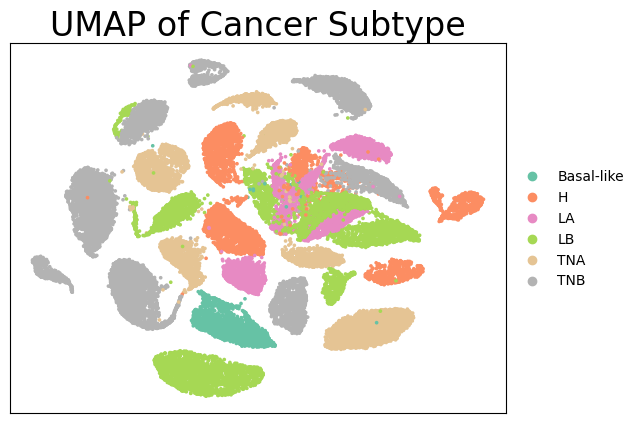

In [ ]:
 # UMAP of cancer types
 if 'Cancer_subtype' in adata.obs.columns:
    # Create the UMAP plot
    ax = sc.pl.umap(
        adata,
        color='Cancer_subtype',  # Color code cells by Cancer Subtype
        palette="Set2",          # Choose a color palette
        size=28,
        title="UMAP of Cancer Subtype",
        show=False               # Do not display immediately
    )

    # Hide x and y axis labels
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title("UMAP of Cancer Subtype", fontsize=24)
    # Display the plot
    plt.tight_layout
    plt.savefig("/content/drive/MyDrive/Colab Notebooks/UMAP_of_Cancer_Subtype.png", transparent = True, bbox_inches="tight")
else:
    print("Cancer_subtype column is not found in the dataset.")


In [ ]:
print(adata.obs.keys())

Index(['FullCode', 'Cell Type'], dtype='object')


TypeError: ylabel() missing 1 required positional argument: 'ylabel'

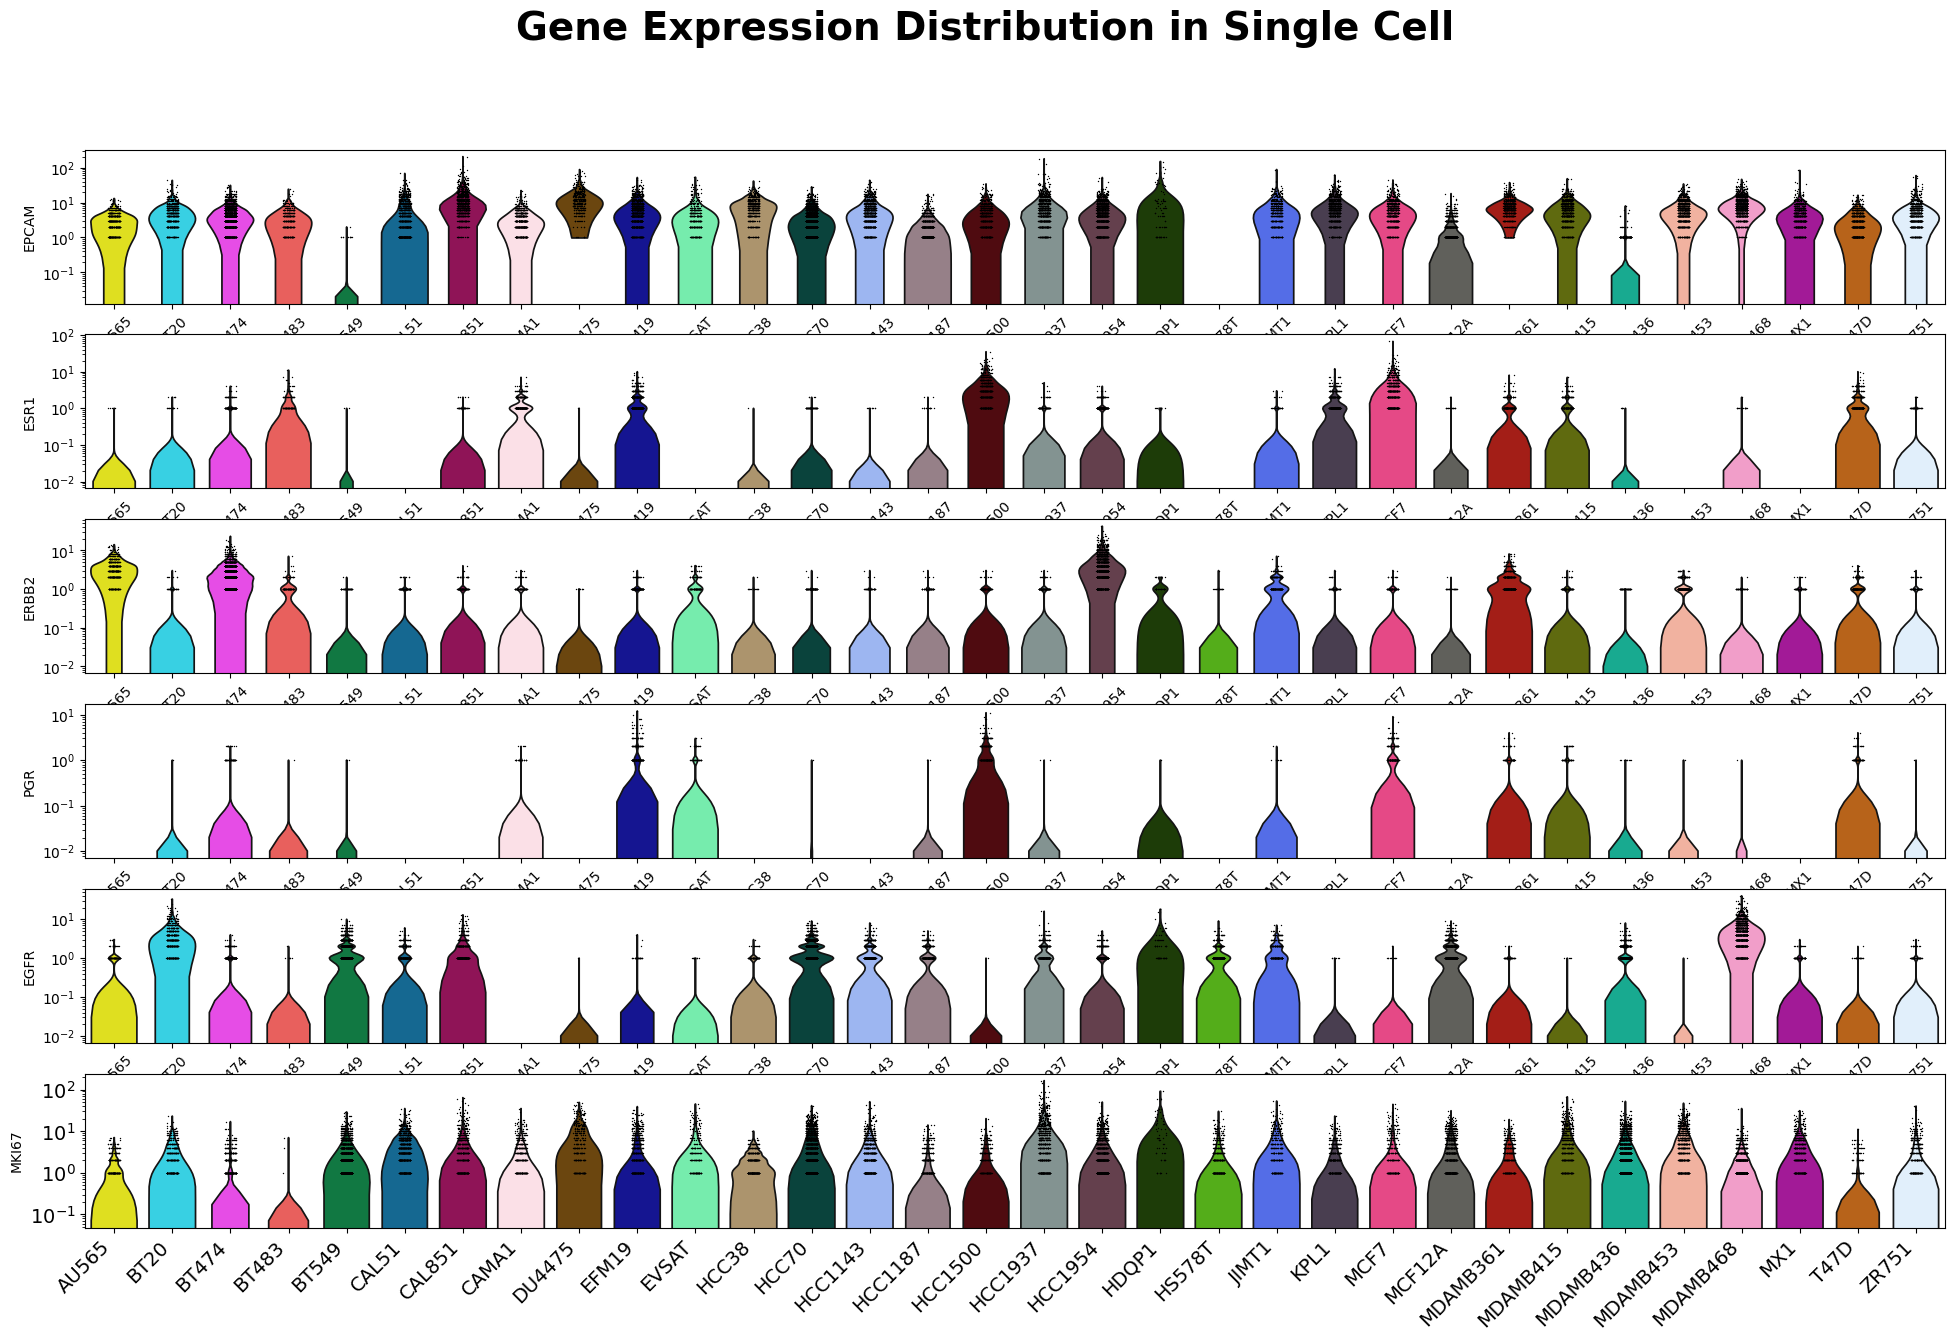

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(24, 14))
# Flatten the axes array for easier indexing
axes = axes.flatten()
genes_of_interest = ["EPCAM","ESR1", "ERBB2", "PGR", "EGFR", "MKI67"]
for i, gene in enumerate(genes_of_interest):
  sc.pl.violin(
        adata,  # Your AnnData object
        gene,  # Current gene
        groupby='Cell Type',  # Group by cell type (or another category)
        ax=axes[i],  # Specify the current axis
        show=False,  # Don't show the plot immediately
        log=True,  # Log scale for better visualization
        rotation=45,
         # Rotate x-axis labels for better readability
    )
# Customizing the title and font
plt.suptitle(
    'Gene Expression Distribution in Single Cell',
    fontsize=28,  # Set the title font size
    fontweight='bold',  # Make the title bold

)

# Customizing the x and y axis labels
#plt.xlabel(None)
# plt.ylabel('Expression Level', fontsize=14, fontweight='bold', family='Arial')

# Customizing tick labels (x and y axis)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.ylabel(fontsize=20)
plt.tight_layout
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Gene_Expression_Distribution_in_Single_Cell.png", transparent = True, bbox_inches="tight")

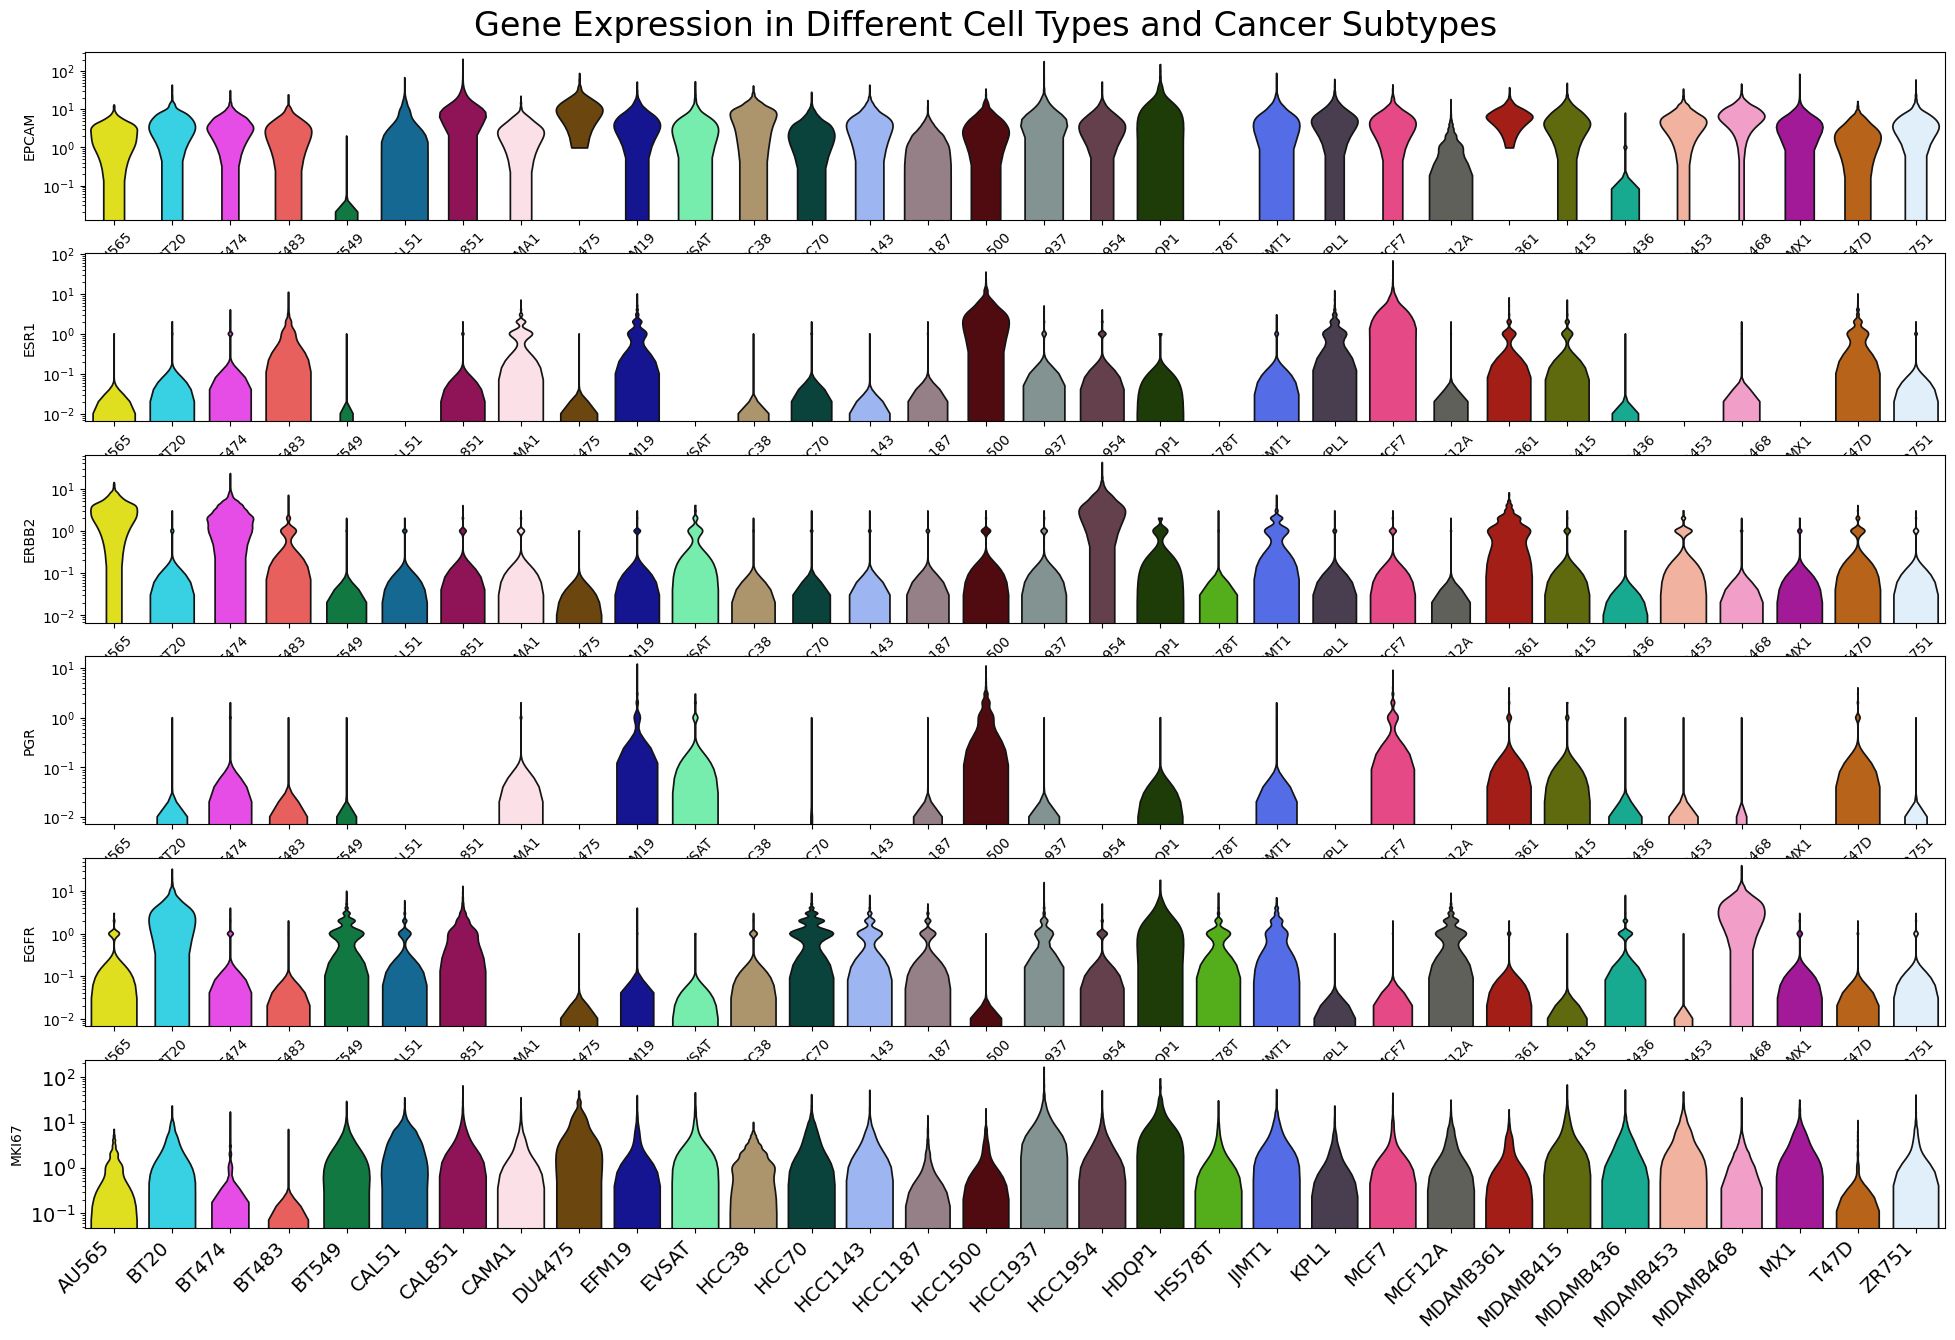

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(24, 14))
axes = axes.flatten()

# Define your genes and subgroups
genes_of_interest = ["EPCAM", "ESR1", "ERBB2", "PGR", "EGFR", "MKI67"]
cancer_subtypes = adata.obs['Cancer_subtype'].astype(str)  # Ensure it's a string for plotting

# Iterate through each gene
for i, gene in enumerate(genes_of_interest):
  sc.pl.violin(
        adata,
        gene,
        groupby='Cell Type',
        ax=axes[i],
        show=False,
        log=True,
        rotation=45,
        stripplot=False,  # Disable default stripplot
        size=1.5,  # Adjust point size for better visibility
        hue=cancer_subtypes,
    )


# Set the main title and adjust layout
fig.suptitle("Gene Expression in Different Cell Types and Cancer Subtypes" , fontsize=24)
plt.subplots_adjust(top=0.95)  # Adjust top to fit the main title

# plt.show()
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.tight_layout
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Gene_Expression_Distribution_in_Single_Cell.png", transparent = True, bbox_inches="tight")

<ipython-input-61-56eb41d53cbd>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-61-56eb41d53cbd>:41: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
<ipython-input-61-56eb41d53cbd>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-61-56eb41d53cbd>:41: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
<ipython-input-61-56eb41d53cbd>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Ass

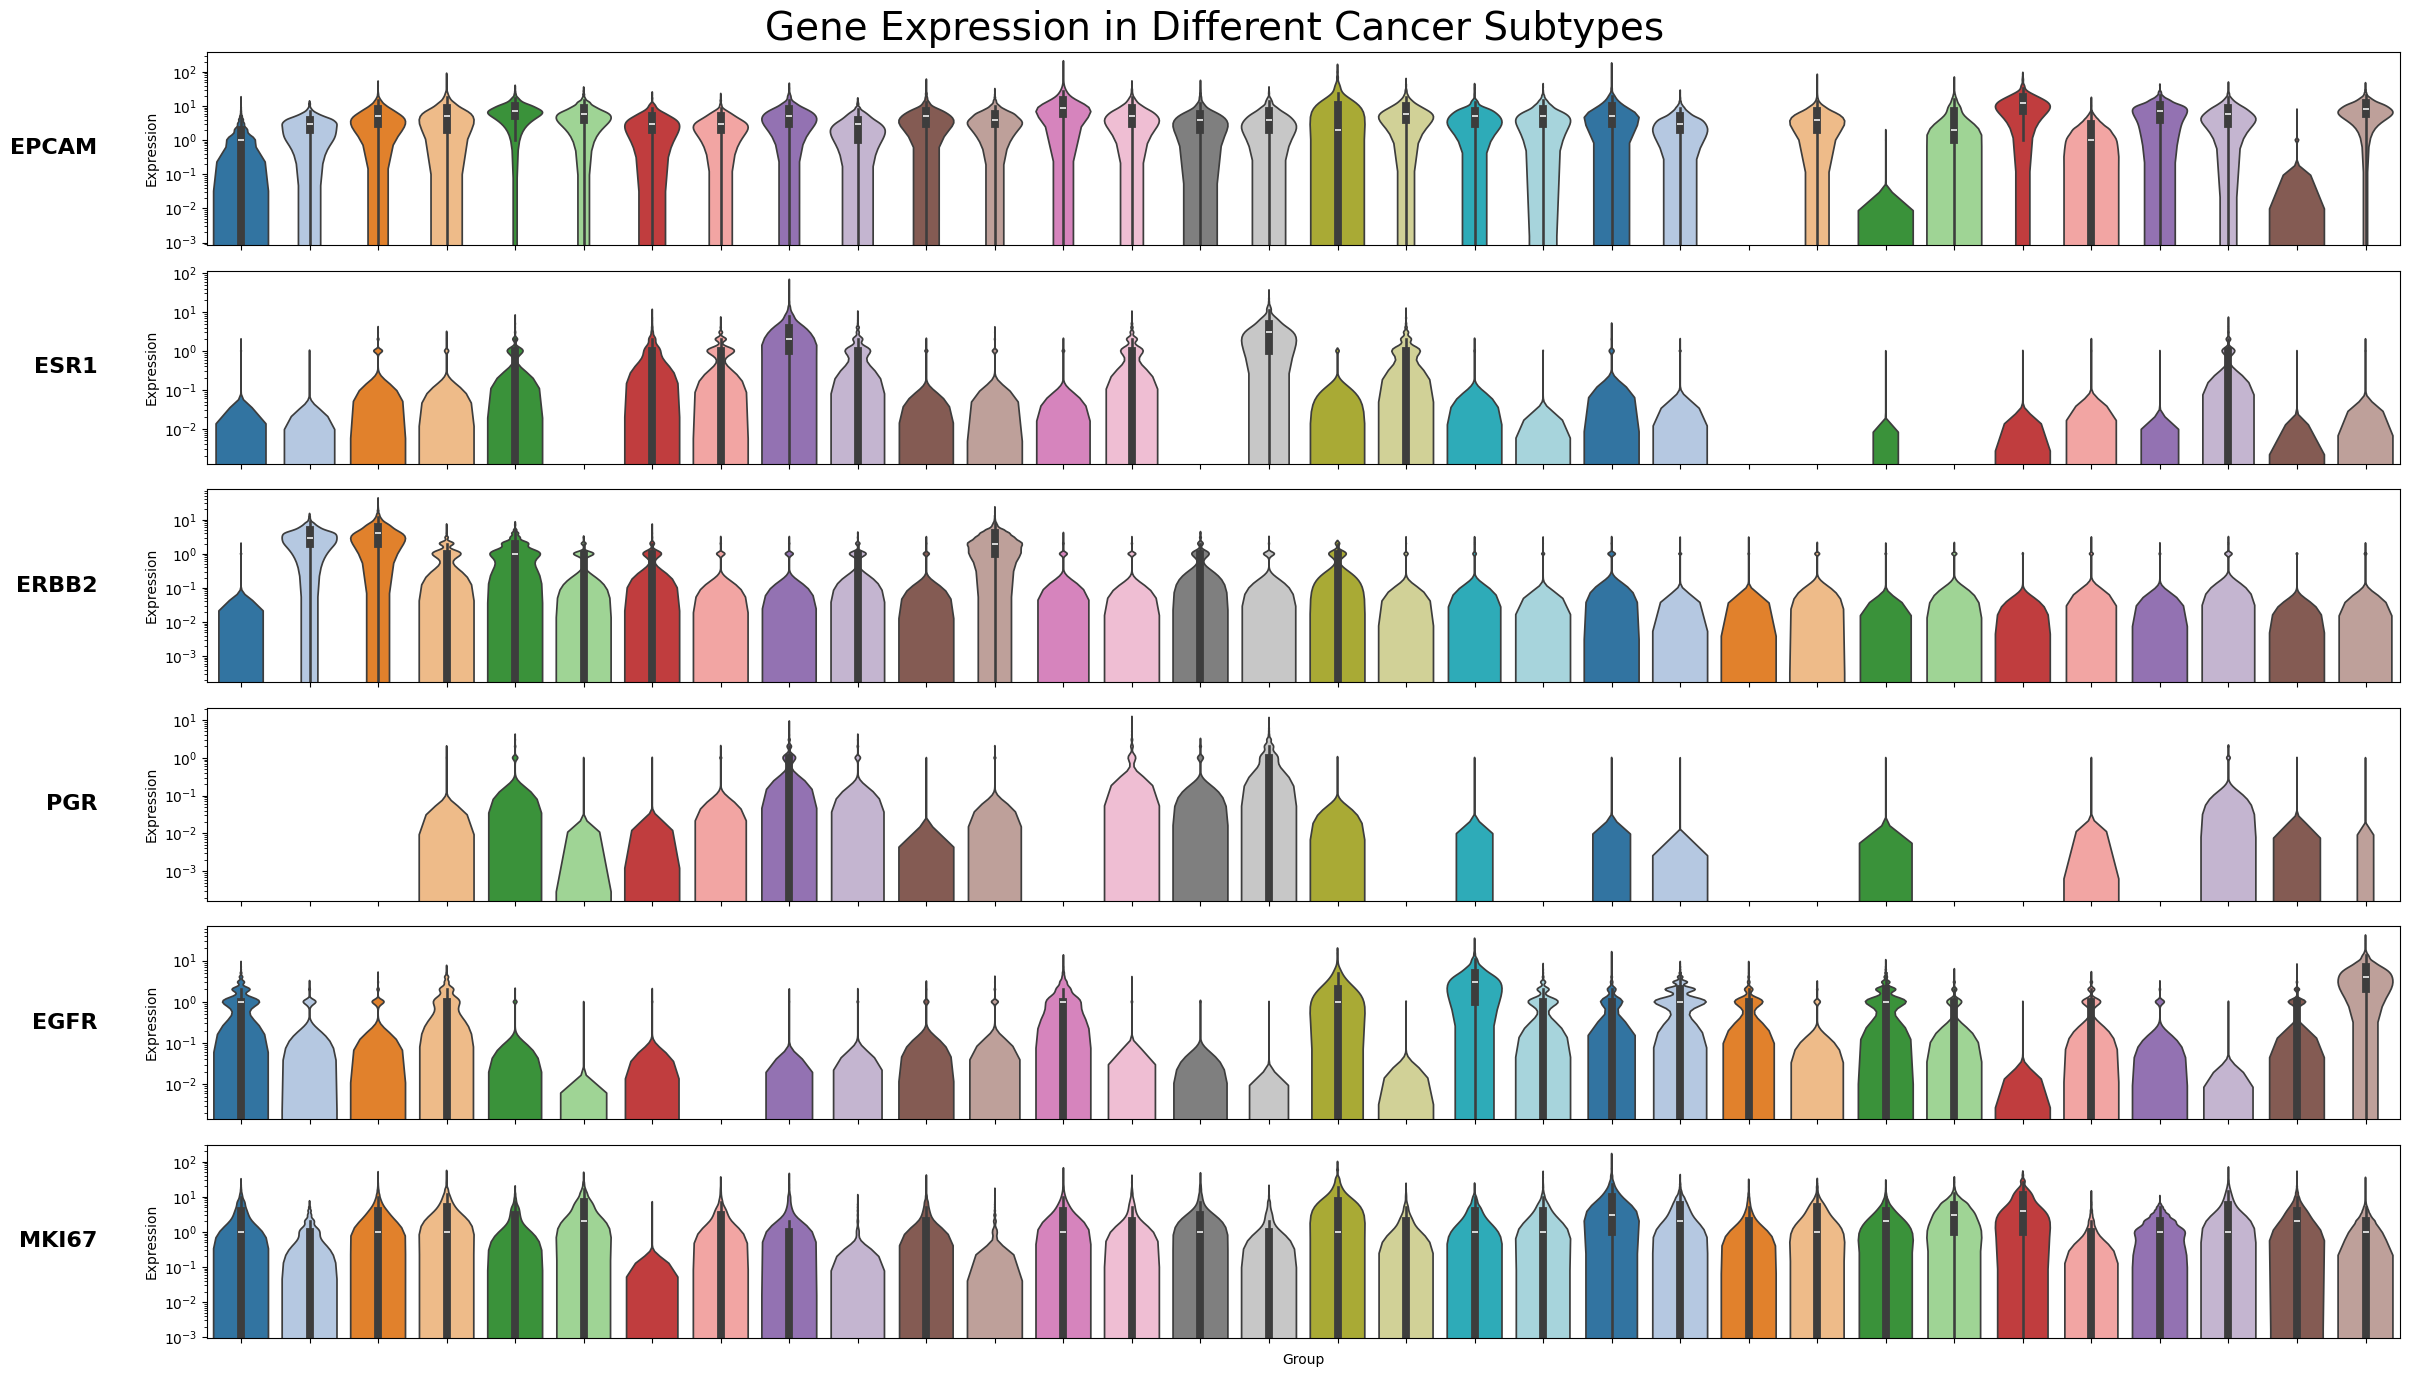

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(24, 14), sharex=True)
axes = axes.flatten()

# Define your genes and subgroups
genes_of_interest = ["EPCAM", "ESR1", "ERBB2", "PGR", "EGFR", "MKI67"]
cancer_subtypes = adata.obs['Cancer_subtype'].astype(str)
cell_types = adata.obs['Cell Type'].astype(str)

# Define the order of Cancer Subtypes and Cell Types
cancer_subtype_order = sorted(cancer_subtypes.unique())  # Modify if you need a specific order
cell_type_order = sorted(cell_types.unique())

# Generate ordered groups based on cancer subtype and cell type
ordered_groups = [
    f"{cancer} - {cell}"
    for cancer in cancer_subtype_order
    for cell in cell_type_order
]

# Iterate through each gene
for i, gene in enumerate(genes_of_interest):
    # Extract expression data and create a DataFrame
    expression_data = np.array(adata[:, gene].X.todense()).flatten()

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        "Expression": expression_data,
        "Cell Type": cell_types,
        "Cancer Subtype": cancer_subtypes
    })

    # Combine "Cancer Subtype" with "Cell Type" for grouping
    plot_df["Group"] = plot_df["Cancer Subtype"] + " - " + plot_df["Cell Type"]

    # Filter to include only groups present in the data
    available_groups = plot_df["Group"].unique()
    plot_order = [group for group in ordered_groups if group in available_groups]

    # Create a violin plot with ordered x-axis
    sns.violinplot(
        data=plot_df,
        x="Group",
        y="Expression",
        ax=axes[i],
        order=plot_order,
        palette="tab20",
        scale="width"
    )

    # Rotate x-tick labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

    # Set y-axis to log scale
    axes[i].set_yscale("log")

    # Remove x-labels for all but the last plot
    if i < len(genes_of_interest) - 1:
        axes[i].set_xticklabels([])
        axes[i].set_xlabel(None)

    # Place the gene name on the left side
    axes[i].text(
        -0.05,  # x position (adjust for spacing)
        0.5,  # y position (centered vertically)
        gene,
        fontsize=16,
        fontweight='bold',
        va='center',  # Vertical alignment
        ha='right',   # Horizontal alignment
        transform=axes[i].transAxes,  # Use axis coordinates
    )

# Adjust layout and set the main title
fig.suptitle('Gene Expression in Different Cancer Subtypes', fontsize=28)
plt.tight_layout()
plt.subplots_adjust(top=0.95, left=0.08)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Gene_Expression_Distribution_in_Single_Cell.png", transparent = True, bbox_inches="tight")

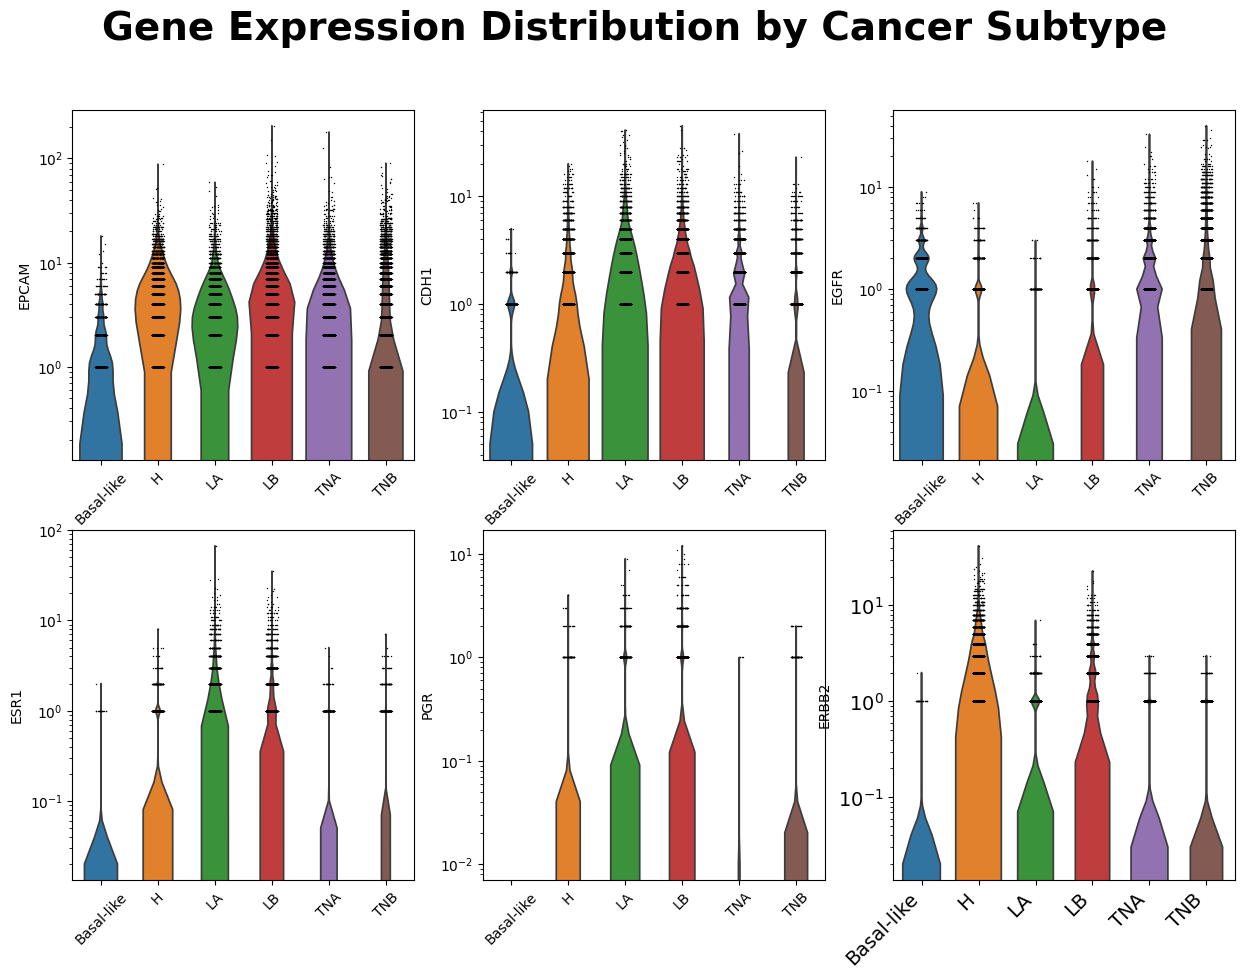

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
# Flatten the axes array for easier indexing
axes = axes.flatten()
genes_of_interest = ["EPCAM","CDH1", "EGFR","ESR1","PGR","ERBB2"]  # Replace with your genes if needed

# Loop over genes and create a violin plot for each subplot
for i, gene in enumerate(genes_of_interest):
  sc.pl.violin(
        adata,  # Your AnnData object
        gene,  # Current gene
        groupby='Cancer_subtype',  # Group by cell type (or another category)
        ax=axes[i],  # Specify the current axis
        show=False,  # Don't show the plot immediately
        log=True,  # Log scale for better visualization
        rotation=45  # Rotate x-axis labels for better readability
    )
# Customizing the title and font
plt.suptitle(
    'Gene Expression Distribution by Cancer Subtype',
    fontsize=28,  # Set the title font size
    fontweight='bold',  # Make the title bold

)

# Customizing the x and y axis labels
#plt.xlabel(None)
# plt.ylabel('Expression Level', fontsize=14, fontweight='bold', family='Arial')

# Customizing tick labels (x and y axis)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.tight_layout
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Gene_Expression_Distribution_by_Cancer_Subtype_violin.png", transparent = True, bbox_inches="tight")

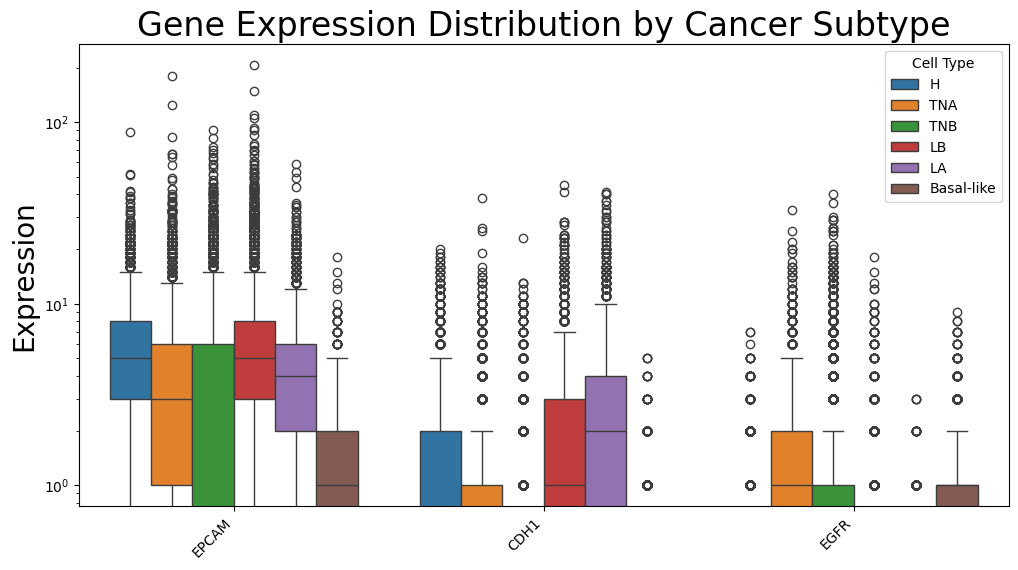

In [ ]:
# Prepare data for seaborn boxplot
genes_of_interest_1 = ["EPCAM","CDH1", "EGFR"]  # Replace with your genes if needed
genes_of_interest_2 =["ESR1","PGR"]
data = []
for gene in genes_of_interest_1:
    if gene in adata.var_names:
        for subtype in adata.obs['cancer_subtype'].unique():
            expr_values = adata[adata.obs['cancer_subtype'] == subtype].to_df()[gene]
            data.extend([[gene, subtype, value] for value in expr_values])

# Create a DataFrame for plotting
df = pd.DataFrame(data, columns=['Gene', 'Subtype', 'Expression'])

# Create the boxplot
fig = plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gene', y='Expression', hue='Subtype')
plt.yscale('log')  # Use log scale if needed
plt.title('Gene Expression Distribution by Cancer Subtype', fontsize=24)
plt.xlabel(None)
plt.ylabel("Expression", fontsize=20)
# rotate the ticks
plt.xticks(rotation = 45, ha= "right")
plt.legend(title='Cell Type')
#plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Gene_Expression_Distribution_by_Cancer_Subtype.png', transparent=True, bbox_inches='tight')


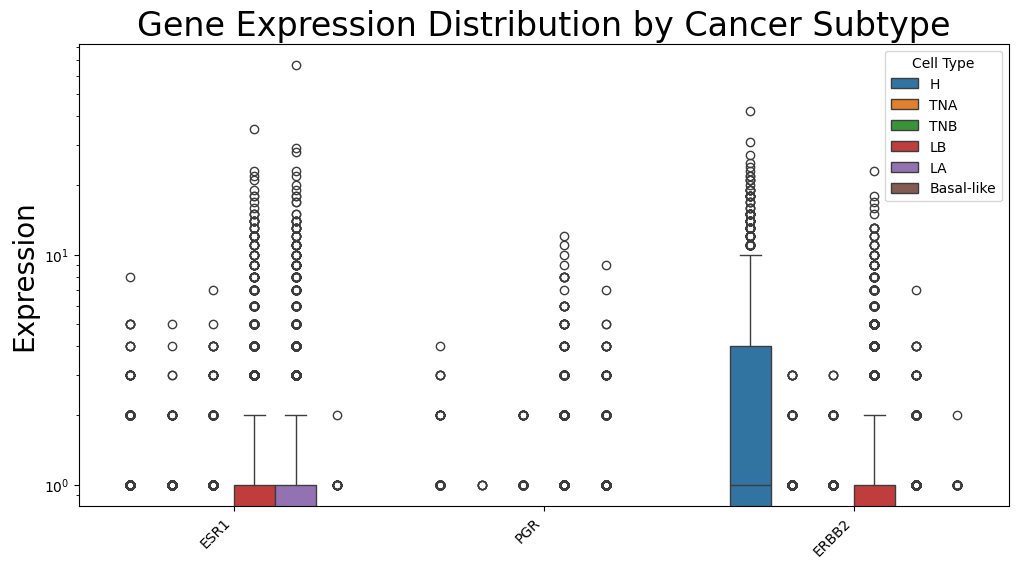

In [ ]:
# Prepare data for seaborn boxplot
genes_of_interest_1 = ["EPCAM","CDH1", "EGFR"]  # Replace with your genes if needed
genes_of_interest_2 =["ESR1","PGR","ERBB2"]
data = []
for gene in genes_of_interest_2:
    if gene in adata.var_names:
        for subtype in adata.obs['cancer_subtype'].unique():
            expr_values = adata[adata.obs['cancer_subtype'] == subtype].to_df()[gene]
            data.extend([[gene, subtype, value] for value in expr_values])

# Create a DataFrame for plotting
df = pd.DataFrame(data, columns=['Gene', 'Subtype', 'Expression'])

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gene', y='Expression', hue='Subtype')
plt.title('Gene Expression Distribution by Cancer Subtype', fontsize=24)
plt.yscale('log')
plt.xlabel(None)
plt.ylabel("Expression", fontsize=20)
# rotate the ticks
plt.xticks(rotation = 45, ha= "right")
plt.legend(title='Cell Type')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Gene_Expression_Distribution_by_Cancer_Subtype_2.png', transparent=True, bbox_inches='tight')

In [ ]:
adata.obs.head()

,FullCode,Cell Type,cancer_subtype,Cancer_subtype
0,AU565_AAACCAGTTTGG,AU565,H,H
1,AU565_AAACGTGCAGCG,AU565,H,H
2,AU565_AAAGCCACATGC,AU565,H,H
3,AU565_AAAGTCGGCTGG,AU565,H,H
4,AU565_AAAGTGCCTAAA,AU565,H,H
